In [6]:
from redditqa.data.loader import load_dataset

In [8]:
load_dataset(name="eli5", task="sft")

Map: 100%|██████████| 4818/4818 [00:02<00:00, 2219.51 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 22541
    })
    eval: Dataset({
        features: ['text'],
        num_rows: 4802
    })
    test: Dataset({
        features: ['text'],
        num_rows: 4818
    })
})

In [3]:
load_dataset(name="askhistorians", task="sft")

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 12086
    })
    eval: Dataset({
        features: ['text'],
        num_rows: 2640
    })
    test: Dataset({
        features: ['text'],
        num_rows: 2590
    })
})

In [5]:
load_dataset(name="askhistorians", task="sft", load_kwargs={"yes_prob_quantile": 0.0})

Map: 100%|██████████| 10400/10400 [00:01<00:00, 6816.02 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 48456
    })
    eval: Dataset({
        features: ['text'],
        num_rows: 10405
    })
    test: Dataset({
        features: ['text'],
        num_rows: 10400
    })
})

In [3]:
dataset_askhistorians = load_dataset(name="askhistorians", task="dpo", load_kwargs={"yes_prob_quantile": 0.0})

Filter:   0%|          | 0/69262 [00:00<?, ? examples/s]

Map: 100%|██████████| 28172/28172 [00:03<00:00, 9384.33 examples/s] 


In [6]:
dataset_askhistorians

DatasetDict({
    train: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected'],
        num_rows: 129998
    })
    eval: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected'],
        num_rows: 28087
    })
    test: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected'],
        num_rows: 28172
    })
})

In [7]:
dataset_eli5 = load_dataset(name="eli5", task="dpo")

Saving the dataset (4/4 shards): 100%|██████████| 584432/584432 [00:08<00:00, 64979.00 examples/s] 


In [12]:
dataset_eli5 = dataset_eli5.rename_column("score_choosen", "score_chosen")

In [9]:
import pandas as pd

In [13]:
def score_diff(row):
    return {"score_diff": abs(row["score_chosen"] - row["score_rejected"])}

dataset_askhistorians = dataset_askhistorians.map(score_diff)
dataset_eli5 = dataset_eli5.map(score_diff)

dataset_askhistorians, dataset_eli5

Map: 100%|██████████| 45660/45660 [00:02<00:00, 18664.59 examples/s]


(DatasetDict({
     train: Dataset({
         features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected', 'score_diff'],
         num_rows: 129998
     })
     eval: Dataset({
         features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected', 'score_diff'],
         num_rows: 28087
     })
     test: Dataset({
         features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected', 'score_diff'],
         num_rows: 28172
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected', 'score_diff'],
         num_rows: 213757
     })
     eval: Dataset({
         features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected', 'score_diff'],
         num_rows: 45320
     })
     test: Dataset({
         features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected', 'score_diff'],
         num_rows: 45660
     })
 }))

In [14]:
series_askhistorians = pd.Series(dataset_askhistorians["train"]["score_diff"])
series_eli5 = pd.Series(dataset_eli5["train"]["score_diff"])

<Axes: >

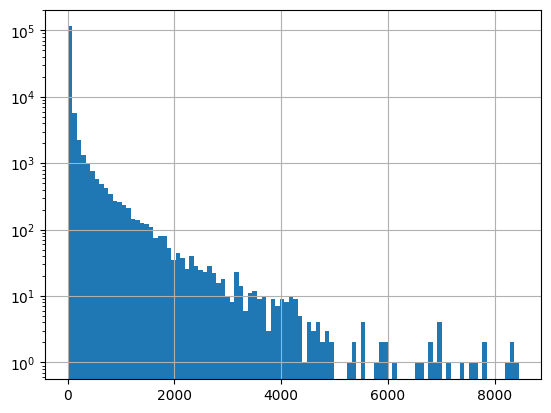

In [15]:
series_askhistorians.hist(bins=100, log=True)

<Axes: >

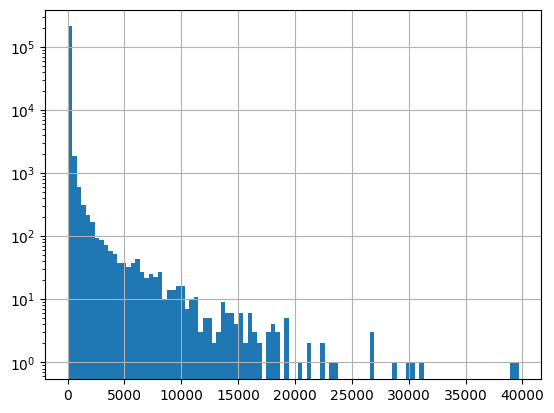

In [16]:
series_eli5.hist(bins=100, log=True)

In [17]:
pct_kept_eli5 = (series_eli5 > 10).sum() / len(series_eli5)
pct_kept_eli5

0.3962911156125881

In [18]:
series_eli5.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1-pct_kept_eli5])

0.100000     1.000000
0.200000     2.000000
0.300000     3.000000
0.400000     4.000000
0.500000     7.000000
0.600000    10.000000
0.700000    17.000000
0.800000    29.000000
0.900000    63.000000
0.603709    10.396291
dtype: float64

In [19]:
series_askhistorians.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1-pct_kept_eli5])

0.100000      1.0
0.200000      2.0
0.300000      4.0
0.400000      6.0
0.500000      9.0
0.600000     13.0
0.700000     20.0
0.800000     39.0
0.900000    111.0
0.603709     13.0
dtype: float64

In [20]:
dataset_askhistorians = load_dataset(name="askhistorians", task="dpo", score_margin=13)
dataset_askhistorians

Map: 100%|██████████| 2979/2979 [00:00<00:00, 9376.62 examples/s] 


DatasetDict({
    train: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected'],
        num_rows: 13429
    })
    eval: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected'],
        num_rows: 2863
    })
    test: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_chosen', 'score_rejected'],
        num_rows: 2979
    })
})

In [23]:
len(set(load_dataset(name="askhistorians", task="dpo", score_margin=13)["train"]["prompt"]))

4740

In [39]:
from redditqa.data import continuous_learning
from transformers import AutoTokenizer
import importlib
importlib.reload(continuous_learning)

<module 'redditqa.data.continuous_learning' from '/workspaces/reddit_qa/redditqa/data/continuous_learning/__init__.py'>

In [32]:
dataset = load_dataset(name="askhistorians", task="sft")
print(dataset)
dataset = continuous_learning.add_continuous_learning_dataset(
    dataset,
    task="sft",
    subset=1000,
    tokenizer=AutoTokenizer.from_pretrained("HuggingFaceH4/zephyr-7b-beta"),
)
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 12086
    })
    eval: Dataset({
        features: ['text'],
        num_rows: 2640
    })
    test: Dataset({
        features: ['text'],
        num_rows: 2590
    })
})


DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 13086
    })
    eval: Dataset({
        features: ['text'],
        num_rows: 3640
    })
    test: Dataset({
        features: ['text'],
        num_rows: 2590
    })
})

In [42]:
dataset = load_dataset(name="askhistorians", task="dpo")
print(dataset)
dataset = continuous_learning.add_continuous_learning_dataset(
    dataset,
    task="dpo",
    subset=1000,
    tokenizer=AutoTokenizer.from_pretrained("HuggingFaceH4/zephyr-7b-beta"),
)
dataset

DatasetDict({
    train: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_choosen', 'score_rejected'],
        num_rows: 29622
    })
    eval: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_choosen', 'score_rejected'],
        num_rows: 6482
    })
    test: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_choosen', 'score_rejected'],
        num_rows: 6458
    })
})


DatasetDict({
    train: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_choosen', 'score_rejected'],
        num_rows: 30622
    })
    eval: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_choosen', 'score_rejected'],
        num_rows: 7482
    })
    test: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'score_choosen', 'score_rejected'],
        num_rows: 6458
    })
})

In [41]:
dataset["train"][-3]

{'prompt': "<|REDDITQA|> Question: What were the lasting positive effects of Napoleon's conquests?\nAnswer: ",
 'chosen': 'When Napoleon conquered a new nation, he would often impose several of the principles of the French Revolution. These included Democracy, due process in courts, equality for all men, and civil law. \n\nFollowing the Napoleonic Wars, Monarchs found it difficult to go back to older types of Absolute Monarchy and many became Enlightened Absolutists (Where religious freedom, freedom of speech and the press, and the right to hold private property were granted but the King was still absolute). Many colonial empires such as Spain and Portugal had difficulty in maintain their overseas colonies and following the Napoleonic Wars many of their colonies began to seek independence (ex. Brazil, Mexico, Argentina, etc.)\n\nNapoleon also created several new nations that had spent decades under oppression from distant monarchs (Italy, Poland, Confederation of the Rhine (mainly Germ

In [45]:
dataset = load_dataset(name="askhistorians", task="sft")
max_seq_length = 1024 * 2
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceH4/zephyr-7b-beta")    
train_lengths = [len((tokenizer.encode(x["text"]))) for x in dataset["train"]]
average_length = sum(train_lengths) / len(train_lengths)
print(f"Average length per packed sequence: {average_length / max_seq_length}")

Average length per packed sequence: 0.3164558618959954
